<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Resources allocation for education in the USA can often be limited. When additional funding is provided, determining which areas of education to target to provide the most improvement can help streamline and optimise the process to ensure the best return. 

In this project, we seek to look at the performance by students across the USA to determine if performance in English or Math is poorer and which may benefit from more funding.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Date Samples

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
numbers = [1,3,5,7,9,11]

def average(values):
    '''finds the average of a list of numbers'''
    return sum(values) / len(values)

average(numbers)

6.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def std_dev(values):
    '''finds the standard deviation in a list of numbers'''
    n = len(values)
    mean = average(values) # references the average function from before
    count = 0
    for i in range(n):
        count += (values[i] - mean) ** 2
    variance = count / n
    return (variance) ** (1/2)

std_dev(numbers)

3.415650255319866

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def clean_str(string):
    '''removes % signs, turns the string into a float and turns the 
    float into a decimal approximation'''
    string = float(string.replace('%','')) /100
    return string

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sat2017 = pd.read_csv('../data/sat_2017.csv')
sat2018 = pd.read_csv('../data/sat_2018.csv')
act2017 = pd.read_csv('../data/act_2017.csv')

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
sat2017.head() # Examine first 5 rows of the sat2017 dataframe

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [6]:
sat2017.isnull().sum() # check for missing values for SATs 2017

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [7]:
sat2017.describe() # looking at mean, percentiles, min, and max for SATs 2017

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
sat2017[sat2017['Math'] < 400] #finding the state(s) with a math score below minimum

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
sat2017.iloc[20, 3] = (1060-536) # recalculating and replacing the wrong math mean

In [10]:
sat2017.info() # checking the different Dtypes for each column for SATs 2017

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
sat2017.shape # checking rows and columns for SATs 2017

(51, 5)

In [12]:
# renaming columns to lower case
sat2017.columns = sat2017.columns.str.lower()

In [13]:
# changing strings in 'participation' column to floats using the clear_str functions
sat2017['participation'] = sat2017['participation'].apply(clean_str)

In [14]:
sat2017.rename(columns= {
            'participation': 'sat_2017_participation',
            'evidence-based reading and writing': 'sat_2017_english',
            'math': 'sat_2017_math',
            'total': 'sat_2017_total',
}, inplace = True)

In [15]:
sat2017['2017_sat_calc_check'] = sat2017['sat_2017_english'] + sat2017['sat_2017_math'] == sat2017['sat_2017_total']

# checking if all the mean scores add up
sat2017[sat2017['2017_sat_calc_check'] == True]['2017_sat_calc_check'].sum() 

36

In [16]:
# finding the columns where totals do not add up
sat2017[sat2017['2017_sat_calc_check'] == False]

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,2017_sat_calc_check
6,Connecticut,1.00,530,512,1041,False
7,Delaware,1.00,503,492,996,False
12,Idaho,0.93,513,493,1005,False
15,Iowa,0.02,641,635,1275,False
18,Louisiana,0.04,611,586,1198,False
21,Massachusetts,0.76,555,551,1107,False
22,Michigan,1.00,509,495,1005,False
24,Mississippi,0.02,634,607,1242,False
27,Nebraska,0.03,629,625,1253,False
32,New York,0.67,528,523,1052,False


In [17]:
# checking if the numbers are only off by 1, and if the different is small
sat2017.loc[(sat2017['2017_sat_calc_check'] == False) &
           ((((sat2017['sat_2017_english']) + (sat2017['sat_2017_math'])) == ((sat2017['sat_2017_total']) + 1)) |
           (((sat2017['sat_2017_english']) + (sat2017['sat_2017_math'])) == ((sat2017['sat_2017_total']) - 1)))
            , :]

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,2017_sat_calc_check
6,Connecticut,1.00,530,512,1041,False
7,Delaware,1.00,503,492,996,False
12,Idaho,0.93,513,493,1005,False
15,Iowa,0.02,641,635,1275,False
18,Louisiana,0.04,611,586,1198,False
21,Massachusetts,0.76,555,551,1107,False
22,Michigan,1.00,509,495,1005,False
24,Mississippi,0.02,634,607,1242,False
27,Nebraska,0.03,629,625,1253,False
32,New York,0.67,528,523,1052,False


In [18]:
# Correcting the error by recalculating total from the individual scores
sat2017['sat_2017_total'] = (sat2017['sat_2017_english'] + sat2017['sat_2017_math'])

In [19]:
sat2018.head() # Examine first 5 rows of the sat2018 dataframe

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [20]:
sat2018.isnull().sum() # check for missing values for SATs 2018

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [21]:
sat2018.describe() # looking at mean, percentiles, min, and max for SATs 2017

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [22]:
sat2018.info() # checking the different Dtypes for each column for SATs 2017

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [23]:
sat2018.columns = sat2018.columns.str.lower()

In [24]:
sat2018['participation'] = sat2018['participation'].apply(clean_str)

In [25]:
sat2018.rename(columns= {                             # renaming the columns to be more readable
            'participation': 'sat_2018_participation',
            'evidence-based reading and writing': 'sat_2018_english',
            'math': 'sat_2018_math',
            'total': 'sat_2018_total',
}, inplace = True)

In [26]:
sat2018['2018_sat_calc_check'] = sat2018['sat_2018_english'] + sat2018['sat_2018_math'] == sat2018['sat_2018_total']
    
# checking if all the mean scores add up
sat2018[sat2018['2018_sat_calc_check'] == True]['2018_sat_calc_check'].sum() 

42

In [27]:
# finding the columns where totals do not add up
sat2018[sat2018['2018_sat_calc_check'] == False]

,state,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,2018_sat_calc_check
3,Arkansas,0.05,592,576,1169,False
6,Connecticut,1.00,535,519,1053,False
7,Delaware,1.00,505,492,998,False
16,Kansas,0.04,633,631,1265,False
22,Michigan,1.00,511,499,1011,False
31,New Mexico,0.16,552,540,1093,False
33,North Carolina,0.52,554,543,1098,False
45,Vermont,0.64,565,554,1120,False
50,Wyoming,0.03,633,625,1257,False


In [28]:
# checking if the numbers are only off by 1, and if the different is small
sat2018.loc[(sat2018['2018_sat_calc_check'] == False) &
           ((((sat2018['sat_2018_english']) + (sat2018['sat_2018_math'])) == ((sat2018['sat_2018_total']) + 1)) | 
            (((sat2018['sat_2018_english']) + (sat2018['sat_2018_math'])) == ((sat2018['sat_2018_total']) - 1)))
            , :]

,state,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,2018_sat_calc_check
3,Arkansas,0.05,592,576,1169,False
6,Connecticut,1.00,535,519,1053,False
7,Delaware,1.00,505,492,998,False
16,Kansas,0.04,633,631,1265,False
22,Michigan,1.00,511,499,1011,False
31,New Mexico,0.16,552,540,1093,False
33,North Carolina,0.52,554,543,1098,False
45,Vermont,0.64,565,554,1120,False
50,Wyoming,0.03,633,625,1257,False


In [29]:
# Correcting the error by recalculating total from the individual scores
sat2018['sat_2018_total'] = (sat2018['sat_2018_english'] + sat2018['sat_2018_math'])

In [30]:
act2017.isnull().sum() # check for missing values for ACT 2017

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [31]:
act2017.describe() # looking at mean, percentiles, min, and max for ACT 2017

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [32]:
act2017[act2017['Science'] < 16] # finding unusually low scores, 16 was given as 
                                 # the bottom end of ACT scores on prepscholar

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [33]:
science_score = round((23.6*4) - 23.3 - 23.1 - 24.2, 1) # calculate science based on average
act2017.iloc[21, 5] = science_score     # replace wrong science score

In [34]:
act2017.iloc[21,:]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.8
Composite            23.6
Name: 21, dtype: object

In [35]:
act2017.info()    # check datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [36]:
act2017['Participation'] = act2017['Participation'].apply(clean_str)

In [37]:
act2017['Composite']

0      21.0
1      19.2
2      19.8
3      19.7
4      19.4
5      22.8
6      20.8
7      25.2
8      24.1
9      24.2
10     19.8
11     21.4
12     19.0
13     22.3
14     21.4
15     22.6
16     21.9
17     21.7
18     20.0
19     19.5
20     24.3
21     23.6
22     25.4
23     24.1
24     21.5
25     18.6
26     20.4
27     20.3
28     21.4
29     17.8
30     25.5
31     23.9
32     19.7
33     24.2
34     19.1
35     20.3
36     22.0
37     19.4
38     21.8
39     23.7
40     24.0
41     18.7
42     21.8
43     19.8
44     20.7
45     20.3
46     23.6
47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [38]:
act2017.iloc[51, 6] = 20.2 # correcting row 51 of the composite column

In [39]:
act2017['Composite'].tail()

47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: object

In [40]:
act2017['Composite'] = pd.to_numeric(act2017['Composite']) # turning the column into floats instead of string

In [41]:
act2017.rename(columns = {
            'Participation': 'act_2017_participation',
            'English': 'act_2017_english',
            'Math': 'act_2017_math',
            'Reading': 'act_2017_read',
            'Science': 'act_2017_science',
            'Composite': 'act_2017_composite',
}, inplace = True)

In [42]:
act2017.columns = act2017.columns.str.lower()

In [43]:
act2017['2017_act_calc_check'] = (round((act2017['act_2017_english'] + act2017['act_2017_math'] + 
                                   act2017['act_2017_read'] + act2017['act_2017_science']) /4, 1
                                  ) == act2017['act_2017_composite'])
     

act2017[act2017['2017_act_calc_check'] == True]['2017_act_calc_check'].sum() 

2

In [44]:
# finding the columns where totals do not add up
act2017[act2017['2017_act_calc_check'] == False]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite,2017_act_calc_check
0,National,0.60,20.3,20.7,21.4,21.0,21.0,False
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,False
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,False
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,False
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,False
5,California,0.31,22.5,22.7,23.1,22.2,22.8,False
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,False
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,False
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,False
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,False


In [45]:
# checking if the difference between calculated ACT composite score and reported score is larger than 0.2
act2017.loc[(act2017['2017_act_calc_check'] == False) & 
            abs((round((act2017['act_2017_english'] + act2017['act_2017_math'] + 
                        act2017['act_2017_read'] + act2017['act_2017_science']) /4, 1)
                ) >= (act2017['act_2017_composite'] + 0.2)), :]


,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite,2017_act_calc_check


In [46]:
# recalculate composite scores, since everything is within 0.2 of the correct score
act2017['act_2017_composite'] = round((act2017['act_2017_english'] + act2017['act_2017_math'] + 
                                       act2017['act_2017_read'] + act2017['act_2017_science']) /4, 1)

In [47]:
# calculate english composite score using ACT English and Read segments
act2017['act_2017_eng_comb'] = round((act2017['act_2017_english'] + act2017['act_2017_read']) /2, 1)

In [48]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   52 non-null     object 
 1   act_2017_participation  52 non-null     float64
 2   act_2017_english        52 non-null     float64
 3   act_2017_math           52 non-null     float64
 4   act_2017_read           52 non-null     float64
 5   act_2017_science        52 non-null     float64
 6   act_2017_composite      52 non-null     float64
 7   2017_act_calc_check     52 non-null     bool   
 8   act_2017_eng_comb       52 non-null     float64
dtypes: bool(1), float64(7), object(1)
memory usage: 3.4+ KB


In [49]:
act2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite,2017_act_calc_check,act_2017_eng_comb
0,National,0.60,20.3,20.7,21.4,21.0,20.8,False,20.8
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.1,False,19.3
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.7,False,19.5
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.6,False,19.4
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.3,False,19.3


In [50]:
# remove 'calc_check columns' from act 2017
act2017.drop(columns = ['2017_act_calc_check'], axis = 1, inplace = True) 

# remove 'calc_check columns' from sats 2017
sat2017.drop(columns = ['2017_sat_calc_check'], axis = 1,inplace = True)

# remove 'state', 'calc_check columns' from sats 2018
sat2018.drop(columns = ['2018_sat_calc_check'], axis = 1,inplace = True) 


In [51]:
# merging all 3 csvs on 'state', left combined to sat 2017, which drops national row from act
results_combined = sat2017.merge(sat2018, how = 'left', on = 'state').merge(act2017, how = 'left', on = 'state')

In [52]:
results_combined.to_csv('../data/results_combined.csv')

In [53]:
results_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_2017_participation  51 non-null     float64
 2   sat_2017_english        51 non-null     int64  
 3   sat_2017_math           51 non-null     int64  
 4   sat_2017_total          51 non-null     int64  
 5   sat_2018_participation  51 non-null     float64
 6   sat_2018_english        51 non-null     int64  
 7   sat_2018_math           51 non-null     int64  
 8   sat_2018_total          51 non-null     int64  
 9   act_2017_participation  51 non-null     float64
 10  act_2017_english        51 non-null     float64
 11  act_2017_math           51 non-null     float64
 12  act_2017_read           51 non-null     float64
 13  act_2017_science        51 non-null     float64
 14  act_2017_composite      51 non-null     floa

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT 2017/2018|States of the US in 2 letter state abbreviations (AL = Alabama)| 
|**sat_2017_participation**|*float*|SAT 2017|Number of students in their cohort who took part in the 2017 SATs (units in decimal approximations of percentages 0.80 means 80% | 
|**sat_2017_english**|*int*|SAT 2017|Mean score for the Evidence-Based Reading and Writing portion of the 2017 cohort within the state (min of 200, max of 800)| 
|**sat_2017_math**|*int*|SAT 2017|Mean score for the Math portion of the 2017 cohort within the state (min of 200, max of 800)| 
|**sat_2017_total**|*int*|SAT 2017|Mean total SAT score of the 2017 cohort within the state (min of 200, max of 800)| 
|**sat_2018_participation**|*float*|SAT 2018|Number of students in their cohort who took part in the 2018 SATs (units in decimal approximations of percentages 0.80 means 80% | 
|**sat_2018_english**|*int*|SAT 2018|Mean score for the Evidence-Based Reading and Writing portion of the 2018 cohort within the state (min of 200, max of 800)| 
|**sat_2018_math**|*int*|SAT 2018|Mean score for the Math portion of the 2018 cohort within the state (min of 200, max of 800)| 
|**sat_2018_total**|*int*|SAT 2018|Mean total SAT score of the 2018 cohort within the state (min of 200, max of 800)|
|**act_2017_participation**|*float*|ACT 2017|Number of students in their cohort who took part in the 2017 ACTs (units in decimal approximations of percentages 0.80 means 80% | 
|**act_2017_english**|*float*|ACT 2017|Mean score for the English portion of the 2017 cohort within the state (min of 1, max of 36)| 
|**act_2017_math**|*float*|ACT 2017|Mean score for the Math portion of the 2017 cohort within the state (min of 1, max of 36)| 
|**act_2017_read**|*float*|ACT 2017|Mean score for the Reading portion of the 2017 cohort within the state (min of 1, max of 36)| 
|**act_2017_science**|*float*|ACT 2017|Mean score for the Science portion of the 2017 cohort within the state (min of 1, max of 36)| 
|**act_2017_composite**|*float*|ACT 2017|Mean Composite score of the 2017 cohort within the state, calculated by taking mean of the 4 individual sections (min of 1, max of 36)| 
|**act_2017_eng_comb**|*float*|ACT 2017|Custom score of the 2017 cohort aggregating the mean of the English and Read scores within the state, calculated by taking mean of the 4 individual sections (min of 1, max of 36)| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [73]:
results_combined.describe()

,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite,act_2017_eng_comb
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.000000,0.457451,563.686275,556.235294,1119.921569,0.652549,20.931373,21.182353,22.013725,21.462745,21.398039,21.472549
std,0.352766,45.666901,47.121395,92.487621,0.373143,47.502627,47.772623,94.189138,0.321408,2.353677,1.981989,2.067271,1.753392,2.026474,2.202369
min,0.020000,482.000000,468.000000,950.000000,0.020000,480.000000,480.000000,977.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.600000,17.200000
25%,0.040000,533.500000,523.500000,1055.500000,0.045000,534.500000,522.500000,1058.000000,0.310000,19.000000,19.400000,20.450000,19.950000,19.700000,19.800000
50%,0.380000,559.000000,548.000000,1106.000000,0.520000,552.000000,544.000000,1097.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.300000,21.300000
75%,0.660000,613.000000,599.000000,1211.500000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.550000,23.800000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.400000,25.700000


In [55]:
results_combined.median()

sat_2017_participation       0.38
sat_2017_english           559.00
sat_2017_math              548.00
sat_2017_total            1106.00
sat_2018_participation       0.52
sat_2018_english           552.00
sat_2018_math              544.00
sat_2018_total            1097.00
act_2017_participation       0.69
act_2017_english            20.70
act_2017_math               20.90
act_2017_read               21.80
act_2017_science            21.30
act_2017_composite          21.30
act_2017_eng_comb           21.30
dtype: float64

In [56]:
# Standard deviation of columns as a dictionary
sd = {x: std_dev(results_combined[x].tolist()) for x in results_combined if x != 'state'
    }

In [57]:
results_combined.corr()

,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_read,act_2017_science,act_2017_composite,act_2017_eng_comb
sat_2017_participation,1.000000,-0.874326,-0.855091,-0.867368,0.874763,-0.666313,-0.686941,-0.684459,-0.841234,0.686889,0.710697,0.705352,0.654100,0.696539,0.697940
sat_2017_english,-0.874326,1.000000,0.987056,0.996656,-0.818925,0.814096,0.865909,0.849763,0.716153,-0.461345,-0.486126,-0.488441,-0.423713,-0.470547,-0.475093
sat_2017_math,-0.855091,0.987056,1.000000,0.996860,-0.789166,0.800380,0.878982,0.849476,0.682572,-0.420673,-0.420456,-0.442410,-0.367364,-0.419061,-0.431488
sat_2017_total,-0.867368,0.996656,0.996860,1.000000,-0.806425,0.809755,0.875385,0.852380,0.701372,-0.442123,-0.454248,-0.466577,-0.396381,-0.445845,-0.454422
sat_2018_participation,0.874763,-0.818925,-0.789166,-0.806425,1.000000,-0.762055,-0.791338,-0.785695,-0.756479,0.679643,0.696294,0.680380,0.647999,0.682729,0.681565
sat_2018_english,-0.666313,0.814096,0.800380,0.809755,-0.762055,1.000000,0.954661,0.988535,0.522593,-0.347978,-0.355133,-0.363354,-0.320179,-0.351336,-0.356274
sat_2018_math,-0.686941,0.865909,0.878982,0.875385,-0.791338,0.954661,1.000000,0.988665,0.555406,-0.365787,-0.340094,-0.374075,-0.315947,-0.354773,-0.369683
sat_2018_total,-0.684459,0.849763,0.849476,0.852380,-0.785695,0.988535,0.988665,1.000000,0.545262,-0.361023,-0.351600,-0.372982,-0.321725,-0.357131,-0.367183
act_2017_participation,-0.841234,0.716153,0.682572,0.701372,-0.756479,0.522593,0.555406,0.545262,1.000000,-0.843501,-0.861114,-0.866620,-0.837830,-0.859439,-0.857526
act_2017_english,0.686889,-0.461345,-0.420673,-0.442123,0.679643,-0.347978,-0.365787,-0.361023,-0.843501,1.000000,0.967803,0.985999,0.979082,0.991487,0.996993


### Initial Review of Correlations
Examining the relationship in the data, we can see a few things:
<ul>
   <li> A positive correlation between the States with a high participation in the SATs from 2017 to 2017
   <li> A negative relationship between the participation for SATs in both years and the ACTs
   <li> A positive correlation between subjects within each exam and category -- if a state did well in SATs 2017 English, they were likely to do well in SATs 2017 Maths as well
       
       

In [58]:
# lower quantile of States for SAT 2017 English, along with participation
results_combined.loc[(results_combined['sat_2017_english'] < results_combined['sat_2017_english'].quantile(0.25)), 
                     ['state', 'sat_2017_participation']]

,state,sat_2017_participation
4,California,0.53
6,Connecticut,1.00
7,Delaware,1.00
8,District of Columbia,1.00
9,Florida,0.83
12,Idaho,0.93
19,Maine,0.95
22,Michigan,1.00
29,New Hampshire,0.96
30,New Jersey,0.70


### Table of States Participation for States with an 2017 SAT English Score in the Lowest Quantile

<ul>
    <li> As is expected most States on the list feature high participation rates
    <li> Surprisingly, Oklahoma shows up on this list despite its low participation rate. This could indicate a poor education for English but should be check against the ACT scores, as it might be a symptom of the best students taking the ACT scores only
            

In [59]:
# lower quantile of States for SAT 2017 Math, along with participation
results_combined.loc[(results_combined['sat_2017_math'] < results_combined['sat_2017_math'].quantile(0.25)),
                     ['state', 'sat_2017_participation']]

,state,sat_2017_participation
6,Connecticut,1.00
7,Delaware,1.00
8,District of Columbia,1.00
9,Florida,0.83
10,Georgia,0.61
12,Idaho,0.93
19,Maine,0.95
22,Michigan,1.00
29,New Hampshire,0.96
32,New York,0.67


### Table of States Participation for States with an 2017 SAT Math Score in the Lowest Quantile

<ul>
    <li> States in the lowest quantile here are reliably high in participation rate
    <li> COmparatively, many States that appear in the lowest quartile for English, also appear in the lowest quartile for Math
</ul>

In [60]:
# SAT participations for 2017 and 2018 for State participations over 0.95
results_combined.loc[((results_combined['sat_2017_participation'] > 0.95) | 
                      (results_combined['sat_2018_participation'] > 0.95)), 
                     ['state', 'sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
13,Illinois,0.09,0.99
19,Maine,0.95,0.99
22,Michigan,1.00,1.00
29,New Hampshire,0.96,0.96
39,Rhode Island,0.71,0.97


### Table of States Participation for the SATs from 2017 to 2018

<ul>
    <li> List was filtered to >0.95 to allow for any slight drops in accidents due to sickness or injury within the cohort
    <li> States that showed high participation in 2017, similarly showed high participation in 2018
    <li> A number of additional States appeared in the 2018 list at very high participation rates, possibly indicative of States that had decided to mandate/encourage the taking of the SATs in the following year

In [61]:
# Differences of over 25 between the two subjects for all States across both years
results_combined.loc[((results_combined['sat_2017_english']) - (results_combined['sat_2017_math']) > 25) |
                     ((results_combined['sat_2017_english']) - (results_combined['sat_2017_math']) < -25) |
                     ((results_combined['sat_2018_english']) - (results_combined['sat_2018_math']) > 25) |
                     ((results_combined['sat_2018_english']) - (results_combined['sat_2018_math']) < -25), 
                     ['state']]

,state
11,Hawaii
24,Mississippi
44,Utah
48,West Virginia


### Table of States with a Disparity of Over 25 Points Between the 2 Mean Scores

<ul>
    <li> This is an initial list looking at the disparity between the two test subjects to determine if there are even States showing disparities between subjects
    <li> A total of 4 States showed up for this initial survey with a difference between scores of over 25
    <li> While not conclusive, it does indicate that there is some disparity in States although we have no looked into which subjects in particular this applies to yet

In [62]:
score_dominance = pd.DataFrame(results_combined['state'])
score_dominance['sat_2017_score_fraction'] = results_combined['sat_2017_english']/results_combined['sat_2017_math']
score_dominance['sat_2018_score_fraction'] = results_combined['sat_2018_english']/results_combined['sat_2018_math']
score_dominance['act_2017_score_fraction'] = results_combined['act_2017_eng_comb']/results_combined['act_2017_math']

score_dominance[['state', 'sat_2017_score_fraction', 'sat_2018_score_fraction', 'act_2017_score_fraction']]

,state,sat_2017_score_fraction,sat_2018_score_fraction,act_2017_score_fraction
0,Alabama,1.036713,1.042032,1.048913
1,Alaska,1.026266,1.033088,0.984848
2,Arizona,1.018083,1.008741,0.979798
3,Arkansas,1.033670,1.027778,1.015789
4,California,1.013359,1.007463,1.004405
5,Colorado,1.018487,1.025692,1.014778
6,Connecticut,1.035156,1.030829,1.040650
7,Delaware,1.022358,1.026423,1.047009
8,District of Columbia,1.029915,1.035417,1.046809
9,Florida,1.046278,1.001821,1.030928


### Comparison of English and Math Scores for each State

<ul>
    <li> In general, States showed a tendency to perform better in English than in Math for all tests, with a few exceptions

In [74]:
score_dominance.loc[(score_dominance['sat_2017_score_fraction'] < 1) |
                    (score_dominance['sat_2018_score_fraction'] < 1) |
                    (score_dominance['act_2017_score_fraction'] < 1),
                    ['state', 'sat_2017_score_fraction', 'sat_2018_score_fraction', 'act_2017_score_fraction']]

,state,sat_2017_score_fraction,sat_2018_score_fraction,act_2017_score_fraction
1,Alaska,1.026266,1.033088,0.984848
2,Arizona,1.018083,1.008741,0.979798
11,Hawaii,1.005545,0.905660,0.963542
21,Massachusetts,1.007260,0.998224,1.011858
23,Minnesota,0.989247,0.981679,0.981395
26,Montana,1.023689,1.023649,0.990099
28,Nevada,1.018083,1.014134,0.955556
33,North Carolina,1.020561,1.020258,0.968912
34,North Dakota,1.022544,0.995334,0.970588
40,South Carolina,1.042226,1.045889,0.983871


### States that performed more poorly on Math than English in one of the Examinations
<ul>
    <li> Less than 10 states had a score across all the examinations that was worse for Maths than for English
    <li> Only Minnesotan Students performed poorer or equal to their English scores for Maths

In [75]:
def score_dominance_1(row):
    '''Returns 1 if the state scored higher on their SAT 2017 English score and 
    0 if they scored higher on their Math score'''
    if row['sat_2017_score_fraction'] >= 1:
        row['2017_sat_dominant'] = 1
    else:
        row['2017_sat_dominant'] = 0
    return row

def score_dominance_2(row):
    '''Returns 1 if the state scored higher on their SAT 2018 English score and 
    0 if they scored higher on their Math score'''
    if row['sat_2018_score_fraction'] >= 1:
        row['2018_sat_dominant'] = 1
    else:
        row['2018_sat_dominant'] = 0
    return row

def score_dominance_3(row):
    '''Returns 1 if the state scored higher on their ACT 2017 English score and 
    0 if they scored higher on their Math score'''
    if row['act_2017_score_fraction'] >= 1:
        row['2017_act_dominant'] = 1
    else:
        row['2017_act_dominant'] = 0
    return row

score_dominance = score_dominance.apply(score_dominance_1, axis = 1)
score_dominance = score_dominance.apply(score_dominance_2, axis = 1)
score_dominance = score_dominance.apply(score_dominance_3, axis = 1)

In [76]:
score_dominance[['2017_sat_dominant', '2018_sat_dominant', '2017_act_dominant']].sum()

2017_sat_dominant    49
2018_sat_dominant    45
2017_act_dominant    39
dtype: int64

### Table of States that Performed Better in English vs Math for SATs and ACTs

<ul>
    <li> States performed overwhelmingly better in their English scores over their Math scores

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

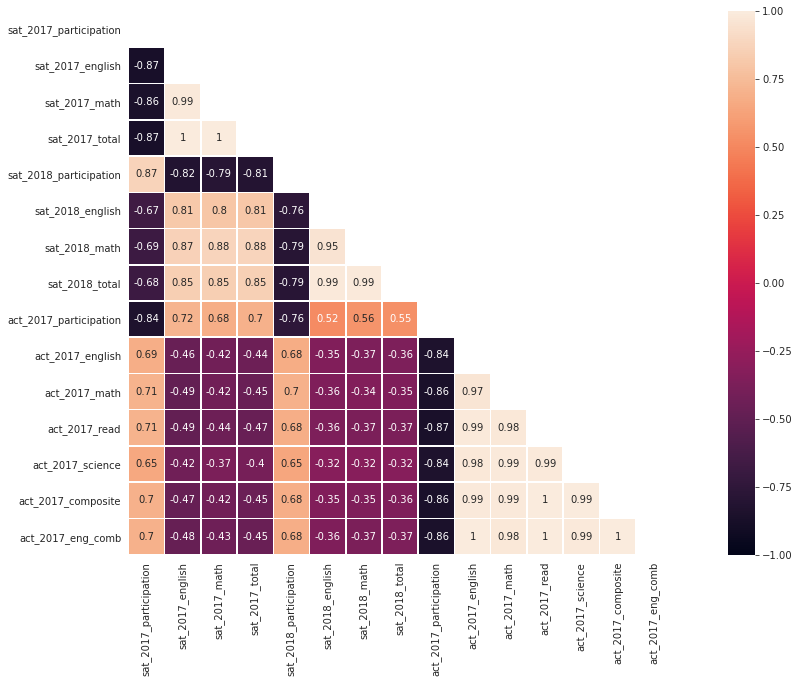

In [66]:
plt.figure(figsize=(20,10))

corr = results_combined.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)


### Heatmap of All Measurements

<ul>
    <li> Although the SATs and the ACTs have different sections testing multiple skills, the high correlation within each test suggests that States that typically do well for one, do well for the other
    <li> The negative of correlation between SATs and ACTs suggests that the cohort taking the two tests differ, with students favouring either one or the other and not taking both, hence states doing particularly well in one. do not do particularly well in the other
    <li> Along with the SAT attendance bring negatively correlated with ACT attendance, using both examinations would be used to accurately capture as much as the demographic as possible 

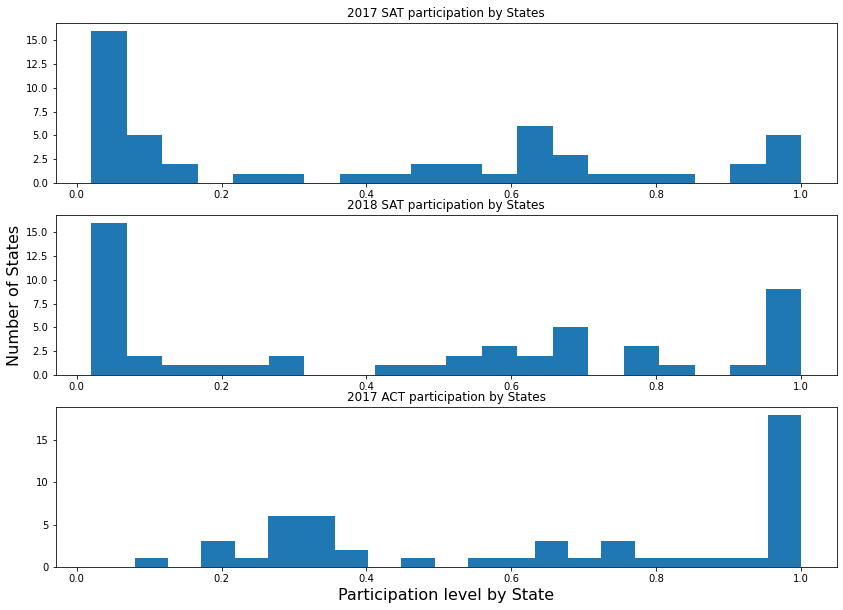

In [67]:
plt.figure(figsize = (14,10))

ax1 = plt.subplot(3, 1, 1)
ax1.set_title('2017 SAT participation by States')
ax1.hist(results_combined['sat_2017_participation'], bins = 20)

ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.set_title('2018 SAT participation by States')
ax2.hist(results_combined['sat_2018_participation'],bins = 20)
plt.ylabel('Number of States', fontsize = 16)

ax3 = plt.subplot(3, 1, 3, sharex=ax1)
ax3.set_title('2017 ACT participation by States')
ax3.hist(results_combined['act_2017_participation'],bins = 20)

plt.xlabel('Participation level by State', fontsize = 16);

### Histograms of State Participation Across Exams Across Years

<ul>
    <li> The emphasis on the ACT exam is clear when looking at the histograms, with the ACTs showing a much higher participation by States
    <li> Even States with a low participation in the ACTs, show a much higher participation rate than the lowest participation rates for the SATs
    <li> More weight should be given to the ACT scores as the higher participation rates indicate that is has a greater sample size than the SATs

In [77]:
def normalise(row):
    '''This function normalises scores by finding subtracting the number from its mean 
    and then dividing by the range between the man and min numbers in the range'''
    for score in row:
        max_value = row.max()
        min_value = row.min()
        normal = (row - min_value) / (max_value - min_value)
    return normal

# 3 new data frames were created for each subset of examination scores
sat_2017 = pd.DataFrame(results_combined['state'])
sat_2018 = pd.DataFrame(results_combined['state'])
act_2017 = pd.DataFrame(results_combined['state'])

# scores were normalised and added to each data set
sat_2017['english'] = normalise(results_combined['sat_2017_english'])
sat_2017['math'] = normalise(results_combined['sat_2017_math'])
sat_2018['english'] = normalise(results_combined['sat_2018_english'])
sat_2018['math'] = normalise(results_combined['sat_2018_math'])
act_2017['math'] = normalise(results_combined['act_2017_math'])
act_2017['english'] = normalise(results_combined['act_2017_eng_comb'])

# dataset was concatenated to join all data into one long set for graphing purposes
scores = pd.concat(objs = [sat_2017, sat_2018, act_2017], axis = 0)

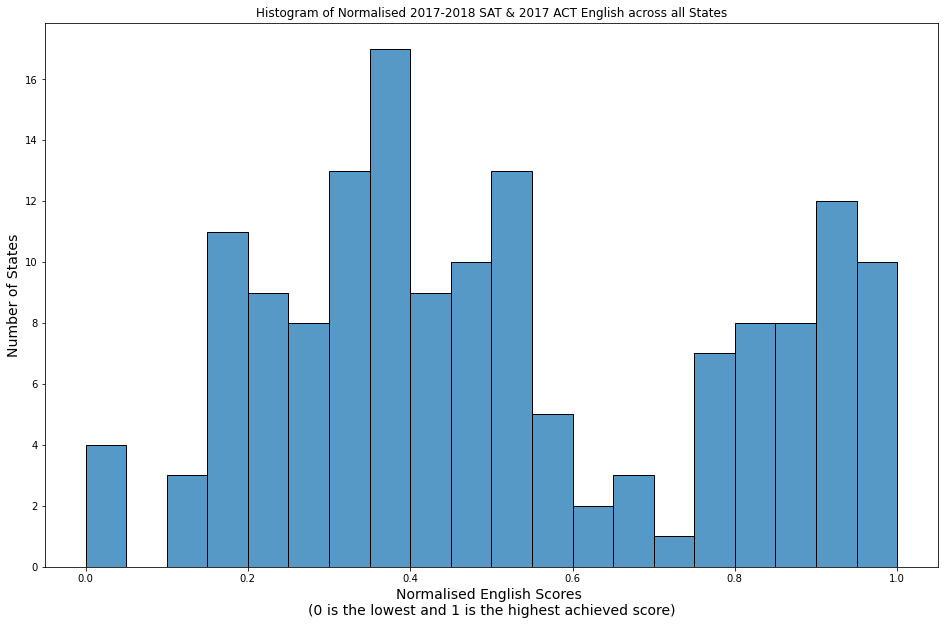

In [78]:
plt.figure(figsize=(16,10))
sns.histplot(
    x = scores['english'],
    bins = 20
)

plt.title('Histogram of Normalised 2017-2018 SAT & 2017 ACT English across all States')
plt.xlabel('Normalised English Scores \n(0 is the lowest and 1 is the highest achieved score)', fontsize = 14)
plt.ylabel('Number of States', fontsize = 14);

### English Scores Across Years, States, Examinations

<ul>
    <li> The histogram was split across two clear groups, with a number of States scoring towards the middle of the pack and a number of States scoring towards the top of the group

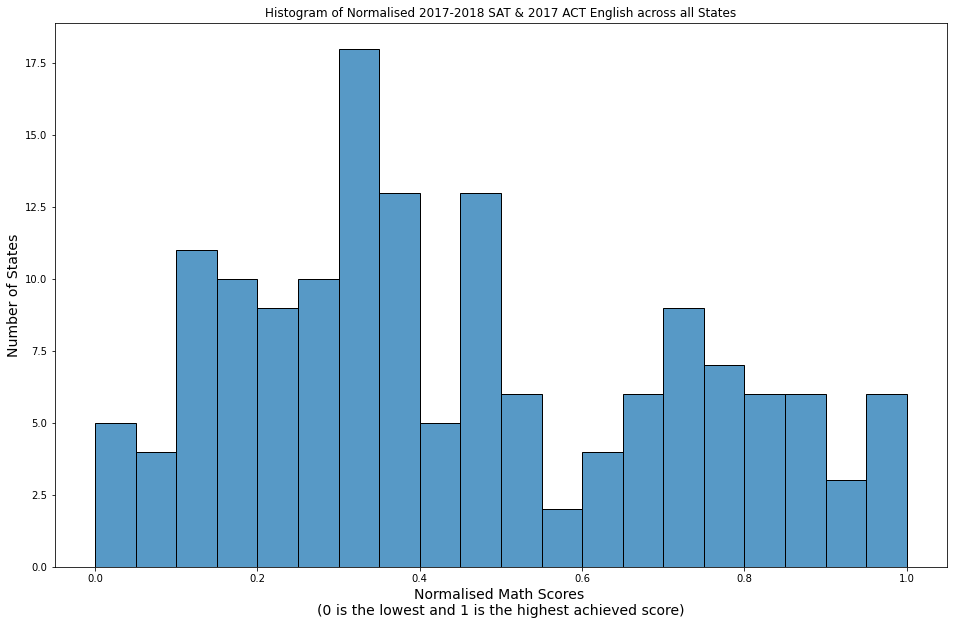

In [79]:
plt.figure(figsize=(16,10))
sns.histplot(
    x = scores['math'],
    bins = 20
)

plt.title('Histogram of Normalised 2017-2018 SAT & 2017 ACT English across all States')
plt.xlabel('Normalised Math Scores \n(0 is the lowest and 1 is the highest achieved score)', fontsize = 14)
plt.ylabel('Number of States', fontsize = 14);

### Math Scores Across Years, States, Examinations

<ul>
    <li> While there are still two clusters in this graph, there peaks are not as exaggerated as they are in the histogram for English scores, suggesting that as a whole, the US does do a better job teaching Math across States than than they do for English

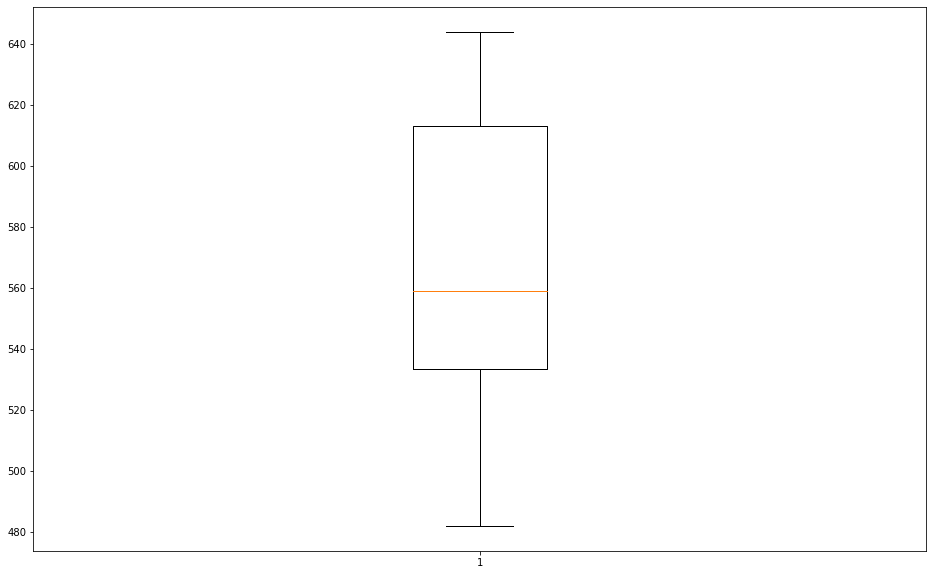

In [92]:
plt.figure(figsize=(16,10))
plt.boxplot(
    x = [results_combined['sat_2017_english']]);

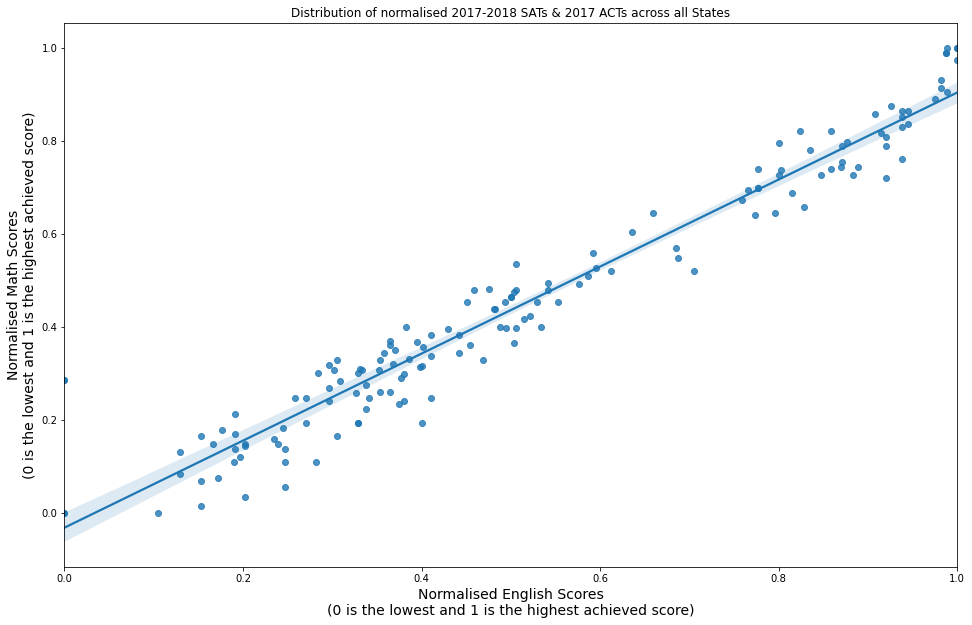

In [80]:
plt.figure(figsize=(16,10))
sns.regplot(
    x = scores['english'],
    y = scores['math'],
)

plt.title('Distribution of normalised 2017-2018 SATs & 2017 ACTs across all States')
plt.xlabel('Normalised English Scores\n(0 is the lowest and 1 is the highest achieved score)', fontsize = 14)
plt.ylabel('Normalised Math Scores\n(0 is the lowest and 1 is the highest achieved score)', fontsize = 14);

### Comparison of Adjusted Math and English Scores

Scores from both the ACTs and SATs were normalised to show regression and variation in the results from the mean, and so that both the English and the Mathematics sections could be plotted against each other.

#### Conclusions

<ul>
    <li> As conjectured based on the initial data exploration, the scores for Math on average are higher for States than the scores for English 
    <li> Interestingly, the reverse is true as scores increase, with Math scores being lower than English scores, 
    <li> At the most extreme end, States that do well for Math do equally well for English, however, due to the low participation levels, this may have amounted to a small handful of students and was not examined further

## Conclusions and Recommendations

### Difference in Scoring between Subjects through the USA

States scored poorer in English than in Maths almost all across the board through the USA. This is in particular more true, in the States that performed poorer, which is important as those States tended to be the ones with higher participation and larger sample pools.

There was a clear difference between States that perform well in Examinations for English, versus a slight more continuous distribution for Maths.

States should almost all consider allocating more funds to their English programmes, over their Math programmes, if there is a new influx with some exceptions. Though these exceptions are based on poor state participation rates and more data is required for conclusive results.

#### Preference between the SATs and the ACTs

More States and students were inclined to take the ACTs over the SATs, as a whole, but an increase in participation was seen in the SATs from 2017 to 2018.

This low participation in the SATs may also be attributed to the change in SAT format from 2016, that led to some consternation on the grading rubric. States may have preferentially selected the ACTs as the grading rubric could be reliably predicted.

It would be good to examine uptake of the SATs across the States over time.

#### Influence of Participation Rates on Results

There is a clear influence on the results by the participation levels in a state. A high level of participation within a state, usually due to the mandating of use of a particular exam, is correlated very strongly with much poorer mean. However, the larger student sample that this results in gives us more meaningful data from those States.

In contrast, students who took the exam in States with low participation rates were likely already pursuing a college education and more prepared than the average student, artificially inflating mean scores of those States.

It would, however, be a useful exercise to compare student bodies to determine population sizes to determine how much weight should be given to the scores from each state. Particularly as, in this case, participations have been given equal weight, although populations can differ by millions from California to Rhode Island.

